## 1-1. 데이터 확보를 위한 크롤링

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains

In [2]:
from bs4 import BeautifulSoup
import time

### 동적 사이트 크롤링을 위한 셀레니움 설정

In [3]:
# 셀레니움 사용을 위한 chrome_driver설정
chrome_driver = 'C:/Users/race9/Desktop/4-1/빅데이터 분석/프로젝트/chromedriver.exe'
dr = webdriver.Chrome(chrome_driver)
act = ActionChains(dr)
url = 'https://www.nba.com/stats/players/traditional/?sort=PTS&dir=-1&Season=2021-22&SeasonType=Regular%20Season'
dr.get(url)

### 셀레니움과 bs4를 활용한 nba.com에서의 선수 기록 크롤링

In [4]:
# nba.com에서 선수 스탯 크롤링을 위한 코드 셀레니움+BeautifulSoup4
import requests
import pandas as pd
players_stats = pd.DataFrame()
def crawling(html):
    soup = BeautifulSoup(html, 'html.parser')
    table_html = soup.find('table')
    table_html = str(table_html) 
    table_df_list = pd.read_html(table_html)
    df = table_df_list[0]
    df.drop(df.iloc[:, 30:], inplace = True, axis = 1)
    df.drop(df.iloc[:, 0:1], inplace = True, axis = 1)
    return df

for i in range(0,12):
    html = dr.page_source
    temp = crawling(html)
    players_stats=pd.concat([players_stats, temp], ignore_index=True)
    button = dr.find_element_by_class_name("stats-table-pagination__next")
    button.click()


In [5]:
players_stats.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  600 non-null    object 
 1   TEAM    600 non-null    object 
 2   AGE     600 non-null    int64  
 3   GP      600 non-null    int64  
 4   W       600 non-null    int64  
 5   L       600 non-null    int64  
 6   MIN     600 non-null    float64
 7   PTS     600 non-null    float64
 8   FGM     600 non-null    float64
 9   FGA     600 non-null    float64
 10  FG%     600 non-null    float64
 11  3PM     600 non-null    float64
 12  3PA     600 non-null    float64
 13  3P%     600 non-null    float64
 14  FTM     600 non-null    float64
 15  FTA     600 non-null    float64
 16  FT%     600 non-null    float64
 17  OREB    600 non-null    float64
 18  DREB    600 non-null    float64
 19  REB     600 non-null    float64
 20  AST     600 non-null    float64
 21  TOV     600 non-null    float64
 22  ST

### bs4을 활용한 hoopshype.com 정적페이지 크롤링

In [6]:
import urllib.request
import pandas as pd
url="https://hoopshype.com/salaries/players/"

html= urllib.request.urlopen(url)
soup= BeautifulSoup(html, 'html.parser')
table_html = soup.find('table')
table_html = str(table_html) 
table_df_list = pd.read_html(table_html)
players_salary = table_df_list[0]
players_salary.drop(players_salary.iloc[:, 3:], inplace = True, axis = 1)
players_salary.drop(players_salary.iloc[:, 0:1], inplace = True, axis = 1)
players_salary=players_salary.rename({'Player':'PLAYER','2021/22':'SALARY'}, axis = 'columns')
print(players_salary)

                PLAYER       SALARY
0        Stephen Curry  $45,780,966
1            John Wall  $44,310,840
2         James Harden  $44,310,840
3    Russell Westbrook  $44,211,146
4         Kevin Durant  $42,018,900
..                 ...          ...
649        Craig Sword      $53,176
650       Luca Vildoza      $42,789
651     Zavier Simpson      $37,223
652  Mfiondu Kabengele      $19,186
653     Melvin Frazier      $13,294

[654 rows x 2 columns]


In [7]:
players_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PLAYER  654 non-null    object
 1   SALARY  654 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


## 1-2. 데이터 전처리

### 앞서 크롤링해온 players_salary와 players_stats을 PLAYER컬럼을 통해 merge함

In [8]:
Players=pd.merge(left = players_stats , right = players_salary, how = "inner", on = "PLAYER")
print(Players)

                    PLAYER TEAM  AGE  GP   W   L   MIN   PTS   FGM   FGA  ...  \
0              Joel Embiid  PHI   28  68  45  23  33.8  30.6   9.8  19.6  ...   
1             LeBron James  LAL   37  56  25  31  37.2  30.3  11.4  21.8  ...   
2    Giannis Antetokounmpo  MIL   27  67  45  22  32.9  29.9  10.3  18.6  ...   
3             Kevin Durant  BKN   33  55  36  19  37.2  29.9  10.5  20.3  ...   
4              Luka Doncic  DAL   23  65  44  21  35.4  28.4   9.9  21.6  ...   
..                     ...  ...  ...  ..  ..  ..   ...   ...   ...   ...  ...   
533              Jon Teske  MEM   25   3   3   0   2.6   0.0   0.0   0.3  ...   
534            Jordan Bell  CHI   27   1   1   0   2.0   0.0   0.0   0.0  ...   
535         Jordan Goodwin  WAS   23   2   1   1   3.0   0.0   0.0   1.5  ...   
536              MJ Walker  PHX   24   2   1   1   4.2   0.0   0.0   2.0  ...   
537            Matt Mooney  NYK   27   1   1   0   1.9   0.0   0.0   1.0  ...   

     AST  TOV  STL  BLK   P

In [9]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 537
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  538 non-null    object 
 1   TEAM    538 non-null    object 
 2   AGE     538 non-null    int64  
 3   GP      538 non-null    int64  
 4   W       538 non-null    int64  
 5   L       538 non-null    int64  
 6   MIN     538 non-null    float64
 7   PTS     538 non-null    float64
 8   FGM     538 non-null    float64
 9   FGA     538 non-null    float64
 10  FG%     538 non-null    float64
 11  3PM     538 non-null    float64
 12  3PA     538 non-null    float64
 13  3P%     538 non-null    float64
 14  FTM     538 non-null    float64
 15  FTA     538 non-null    float64
 16  FT%     538 non-null    float64
 17  OREB    538 non-null    float64
 18  DREB    538 non-null    float64
 19  REB     538 non-null    float64
 20  AST     538 non-null    float64
 21  TOV     538 non-null    float64
 22  ST

SALARY 값이 object임을 확인하여 이를 '$' 와','를 없애서 int 형으로 바꾸어준다.

In [10]:
# SALARY열이 $***.***.***형식으로 되어있는 object타입이므로 이를 일반 숫자로 바꾸어 준다.
salary_int=[]
for salary in Players['SALARY']:
    salary_int.append(salary[1:].replace(",",""))
Players['SALARY']=salary_int


In [11]:
Players['SALARY']=Players['SALARY'].astype(int)

In [12]:
Players.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,SALARY
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,...,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,26.169145,43.576208,22.096654,21.479554,19.024721,8.432900,3.105762,6.820446,43.692751,0.931413,...,1.915242,1.040520,0.608550,0.372862,1.619703,17.409665,3.778810,0.237918,-0.539777,6.657328e+06
std,4.173519,25.740916,15.510973,14.032303,9.786701,6.499478,2.351564,4.921116,13.928538,0.873529,...,1.872756,0.841981,0.411747,0.368458,0.794125,11.581208,8.894653,1.377896,3.419456,9.353986e+06
min,19.000000,1.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.800000,3.722300e+04
25%,23.000000,19.000000,8.000000,9.000000,11.100000,3.500000,1.300000,3.200000,39.525000,0.200000,...,0.600000,0.500000,0.300000,0.100000,1.100000,8.125000,0.000000,0.000000,-2.275000,8.502778e+05
50%,25.000000,49.000000,20.000000,22.000000,18.150000,7.100000,2.600000,5.500000,44.600000,0.700000,...,1.200000,0.800000,0.600000,0.300000,1.600000,15.450000,0.000000,0.000000,-0.500000,2.401537e+06
75%,29.000000,67.000000,35.750000,31.000000,27.300000,11.300000,4.200000,9.175000,49.975000,1.400000,...,2.600000,1.300000,0.900000,0.500000,2.200000,23.300000,3.000000,0.000000,1.400000,8.507006e+06
max,41.000000,82.000000,64.000000,59.000000,43.500000,30.600000,11.400000,21.800000,100.000000,4.500000,...,10.800000,4.500000,2.200000,2.800000,3.800000,58.600000,66.000000,19.000000,12.000000,4.578097e+07


Salary값이 제대로 int형으로 바뀜을 확인할 수 있었다.

In [13]:
# 해당파일 csv형태로 저장
# Players.to_csv("players.csv",mode='w')

In [14]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 537
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  538 non-null    object 
 1   TEAM    538 non-null    object 
 2   AGE     538 non-null    int64  
 3   GP      538 non-null    int64  
 4   W       538 non-null    int64  
 5   L       538 non-null    int64  
 6   MIN     538 non-null    float64
 7   PTS     538 non-null    float64
 8   FGM     538 non-null    float64
 9   FGA     538 non-null    float64
 10  FG%     538 non-null    float64
 11  3PM     538 non-null    float64
 12  3PA     538 non-null    float64
 13  3P%     538 non-null    float64
 14  FTM     538 non-null    float64
 15  FTA     538 non-null    float64
 16  FT%     538 non-null    float64
 17  OREB    538 non-null    float64
 18  DREB    538 non-null    float64
 19  REB     538 non-null    float64
 20  AST     538 non-null    float64
 21  TOV     538 non-null    float64
 22  ST

총 30개의 컬럼(선수 이름, 소속팀, 나이, 뛴 경기수, 이긴 경기, 진 경기, 뛴 시간, 득점, 야투성공 개수, 야투 시도 개수, 야투율, 3점슛 성공 개수, 3점슛 시도 개수, 3점슛 성공률, 자유투 성공 개수, 자유투 시도 개수, 자유투 성공률, 공격리바운드, 수비리바운드, 총 리바운드, 어시스트, 턴오버, 스틸 수, 블록 수, 개인 파울, 판타지 포인트, 더블더블 횟수, 트리플더블 횟수, 득실 마진, 2021-2022시즌 연봉)으로 구성 됨

### nba.com에서 나온 선수중 62명에 대한 연봉정보가 누락되어 총 선수 데이터가 538개가 나왔음

## 2. 데이터 각 컬럼 분석

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,SALARY
0,Joel Embiid,PHI,28,68,45,23,33.8,30.6,9.8,19.6,...,4.2,3.1,1.1,1.5,2.7,55.5,46,2,5.4,31579390
1,LeBron James,LAL,37,56,25,31,37.2,30.3,11.4,21.8,...,6.2,3.5,1.3,1.1,2.2,53.0,21,6,-2.1,41180544
2,Giannis Antetokounmpo,MIL,27,67,45,22,32.9,29.9,10.3,18.6,...,5.8,3.3,1.1,1.4,3.2,56.5,46,4,5.9,39344900
3,Kevin Durant,BKN,33,55,36,19,37.2,29.9,10.5,20.3,...,6.4,3.5,0.9,0.9,2.1,50.3,18,4,4.9,42018900
6,DeMar DeRozan,CHI,32,76,43,33,36.1,27.9,10.2,20.2,...,4.9,2.4,0.9,0.3,2.3,42.7,6,0,1.0,26000000
7,Kyrie Irving,BKN,30,29,14,15,37.6,27.4,10.0,21.2,...,5.8,2.5,1.4,0.6,2.8,44.8,2,0,4.2,35328700
9,Nikola Jokic,DEN,27,74,46,28,33.5,27.1,10.3,17.7,...,7.9,3.8,1.5,0.9,2.6,58.6,66,19,6.0,31044906
10,Jayson Tatum,BOS,24,76,49,27,35.9,26.9,9.3,20.6,...,4.4,2.9,1.0,0.6,2.3,45.2,22,0,8.8,28103500
11,Devin Booker,PHX,25,68,56,12,34.5,26.8,9.7,20.9,...,4.8,2.4,1.1,0.4,2.6,42.2,5,0,6.9,31650600
12,Donovan Mitchell,UTA,25,67,41,26,33.8,25.9,9.2,20.5,...,5.3,3.0,1.5,0.2,2.4,40.9,3,0,4.1,28103500


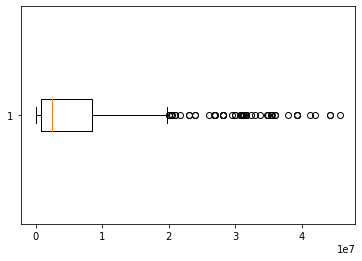

In [15]:
import matplotlib.pyplot as plt
plt.boxplot(Players.SALARY, vert=False)
q3=Players['SALARY'].quantile(0.75)
q1=Players['SALARY'].quantile(0.25)
iqr = q3-q1
c1 = Players['SALARY']>q3+1.5*iqr
c2 = Players['SALARY']<q1-1.5*iqr
Players[c1+c2]

대부분의 선수의 연봉이 $10,000,000보다 적게 형성 되있고, outlier가 아닌 값중 제일 큰 값이 대략 20,000,000을 확인할 수 있다. 그리고 중간값이 $2,401,537인 것을 통해 NBA 대부분의 선수는 2,400,000 달러이하를 받아 상대적으로 많은 선수들의 연봉이 outlier값들로 나오게 된 것 같다. 이를 통해 NBA선수의 평균 연봉은 상대적으로 수가 적은 연봉 상위 선수에 의해 값이 증가한 것 같다.

In [16]:
numeric_columns = Players.describe().columns
cnt = len(numeric_columns)
print(cnt)

28


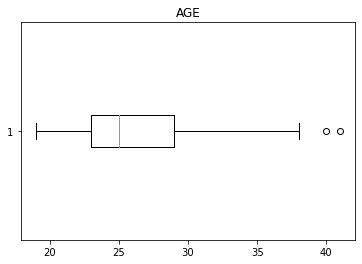

            PLAYER  AGE
450  Udonis Haslem   41
471    Joe Johnson   40


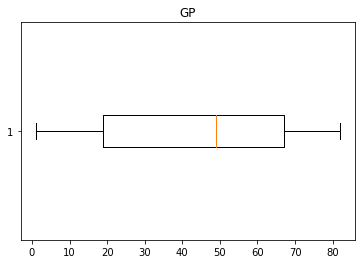

outlier 존재X


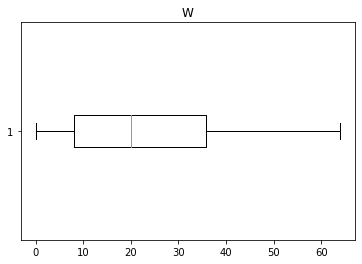

outlier 존재X


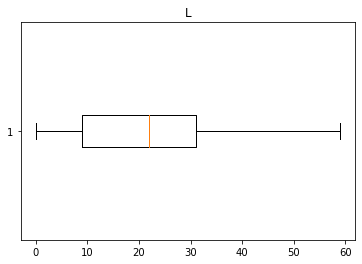

outlier 존재X


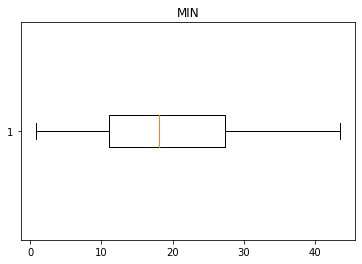

outlier 존재X


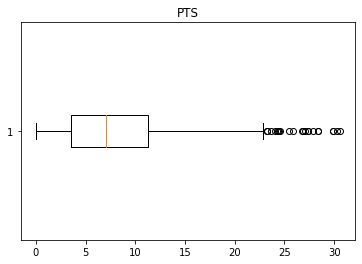

                     PLAYER   PTS
0               Joel Embiid  30.6
1              LeBron James  30.3
2     Giannis Antetokounmpo  29.9
3              Kevin Durant  29.9
4               Luka Doncic  28.4
5                Trae Young  28.4
6             DeMar DeRozan  27.9
7              Kyrie Irving  27.4
8                 Ja Morant  27.4
9              Nikola Jokic  27.1
10             Jayson Tatum  26.9
11             Devin Booker  26.8
12         Donovan Mitchell  25.9
13            Stephen Curry  25.5
14       Karl-Anthony Towns  24.6
15  Shai Gilgeous-Alexander  24.5
16              Zach LaVine  24.4
17              Paul George  24.3
18           Damian Lillard  24.0
19             Jaylen Brown  23.6
20             Bradley Beal  23.2
21            Anthony Davis  23.2
22             De'Aaron Fox  23.2


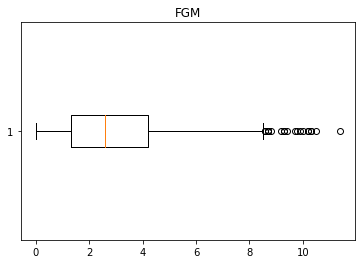

                   PLAYER   FGM
0             Joel Embiid   9.8
1            LeBron James  11.4
2   Giannis Antetokounmpo  10.3
3            Kevin Durant  10.5
4             Luka Doncic   9.9
5              Trae Young   9.4
6           DeMar DeRozan  10.2
7            Kyrie Irving  10.0
8               Ja Morant  10.2
9            Nikola Jokic  10.3
10           Jayson Tatum   9.3
11           Devin Booker   9.7
12       Donovan Mitchell   9.2
14     Karl-Anthony Towns   8.7
17            Paul George   8.6
19           Jaylen Brown   8.7
20           Bradley Beal   8.7
21          Anthony Davis   9.3
22           De'Aaron Fox   8.7
23          Pascal Siakam   8.8
25            CJ McCollum   8.6


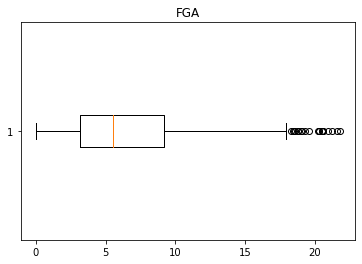

                     PLAYER   FGA
0               Joel Embiid  19.6
1              LeBron James  21.8
2     Giannis Antetokounmpo  18.6
3              Kevin Durant  20.3
4               Luka Doncic  21.6
5                Trae Young  20.3
6             DeMar DeRozan  20.2
7              Kyrie Irving  21.2
8                 Ja Morant  20.6
10             Jayson Tatum  20.6
11             Devin Booker  20.9
12         Donovan Mitchell  20.5
13            Stephen Curry  19.1
15  Shai Gilgeous-Alexander  18.8
17              Paul George  20.5
18           Damian Lillard  19.0
19             Jaylen Brown  18.4
20             Bradley Beal  19.3
22             De'Aaron Fox  18.5
25              CJ McCollum  18.8
30          Dejounte Murray  18.3


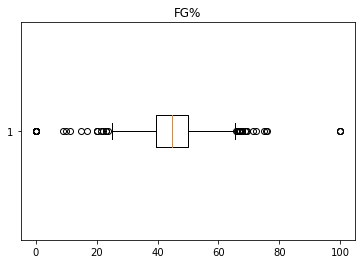

                 PLAYER    FG%
73        Jarrett Allen   67.7
79          Rudy Gobert   71.3
131      Cameron Oliver   66.7
158      Richaun Holmes   66.0
180      Daniel Gafford   69.3
205       Dwight Powell   67.1
213   Mitchell Robinson   76.1
228      Onyeka Okongwu   69.0
230        Damian Jones   65.8
350      Udoka Azubuike   75.5
370       Rayjon Tucker   66.7
423      Devontae Cacok   67.7
429           Matt Ryan   20.0
431       Nick Richards   66.7
448        Juwan Morgan   66.7
461        Jericho Sims   72.2
466         Ahmad Caver  100.0
468         Craig Sword   75.0
470      Jemerrio Jones   66.7
471         Joe Johnson  100.0
472   Langston Galloway   23.1
487     Emmanuel Mudiay    0.0
492      Jordan Schakel    9.1
496      Marcus Garrett   23.8
501   Deividas Sirvydis   10.0
502      Jaden Springer  100.0
504        Tyrell Terry  100.0
505            Ed Davis   68.8
506        Carlik Jones   11.1
507         Isaac Bonga   23.1
511       Jaylen Morris    0.0
512     

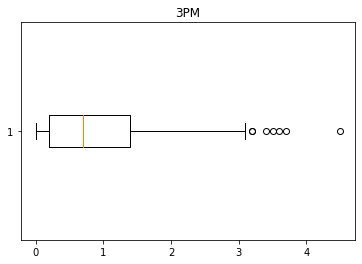

              PLAYER  3PM
7       Kyrie Irving  3.4
12  Donovan Mitchell  3.5
13     Stephen Curry  4.5
18    Damian Lillard  3.2
32     Klay Thompson  3.6
33     Fred VanVleet  3.7
78       Buddy Hield  3.2


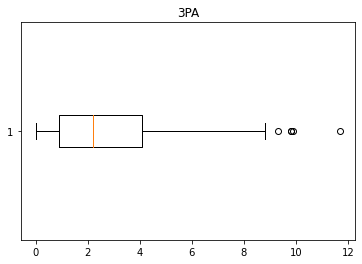

              PLAYER   3PA
12  Donovan Mitchell   9.8
13     Stephen Curry  11.7
18    Damian Lillard   9.8
32     Klay Thompson   9.3
33     Fred VanVleet   9.9


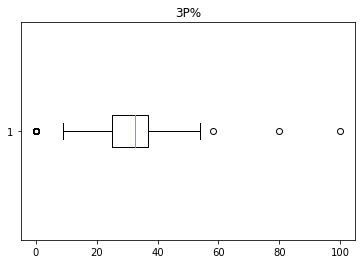

             PLAYER    3P%
43      Bam Adebayo    0.0
79      Rudy Gobert    0.0
100    Jakob Poeltl  100.0
139    Clint Capela    0.0
160     Ivica Zubac    0.0
..              ...    ...
533       Jon Teske    0.0
534     Jordan Bell    0.0
535  Jordan Goodwin    0.0
536       MJ Walker    0.0
537     Matt Mooney    0.0

[83 rows x 2 columns]


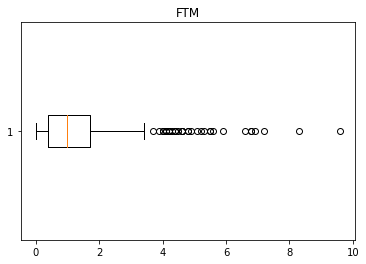

                     PLAYER  FTM
0               Joel Embiid  9.6
1              LeBron James  4.5
2     Giannis Antetokounmpo  8.3
3              Kevin Durant  6.8
4               Luka Doncic  5.6
5                Trae Young  6.6
6             DeMar DeRozan  6.8
7              Kyrie Irving  4.1
8                 Ja Morant  5.5
9              Nikola Jokic  5.1
10             Jayson Tatum  5.3
11             Devin Booker  4.6
12         Donovan Mitchell  4.0
13            Stephen Curry  4.3
14       Karl-Anthony Towns  5.2
15  Shai Gilgeous-Alexander  5.9
16              Zach LaVine  4.8
17              Paul George  4.1
18           Damian Lillard  5.5
19             Jaylen Brown  3.7
20             Bradley Beal  4.2
21            Anthony Davis  4.4
22             De'Aaron Fox  4.4
23            Pascal Siakam  4.2
24           Brandon Ingram  4.8
26             James Harden  7.2
28             Jimmy Butler  6.9
34       Kristaps Porzingis  4.9
37            Julius Randle  4.2
38        

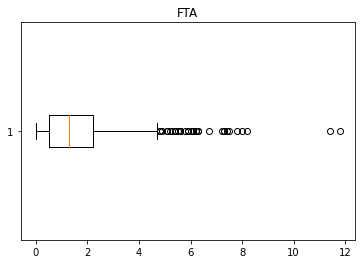

                     PLAYER   FTA
0               Joel Embiid  11.8
1              LeBron James   6.0
2     Giannis Antetokounmpo  11.4
3              Kevin Durant   7.4
4               Luka Doncic   7.5
5                Trae Young   7.3
6             DeMar DeRozan   7.8
8                 Ja Morant   7.3
9              Nikola Jokic   6.3
10             Jayson Tatum   6.2
11             Devin Booker   5.3
14       Karl-Anthony Towns   6.3
15  Shai Gilgeous-Alexander   7.2
16              Zach LaVine   5.6
17              Paul George   4.8
18           Damian Lillard   6.2
19             Jaylen Brown   4.8
20             Bradley Beal   5.1
21            Anthony Davis   6.1
22             De'Aaron Fox   5.9
23            Pascal Siakam   5.6
24           Brandon Ingram   5.9
26             James Harden   8.2
28             Jimmy Butler   8.0
34       Kristaps Porzingis   5.6
37            Julius Randle   5.6
39               RJ Barrett   5.8
41             Jerami Grant   5.5
43            

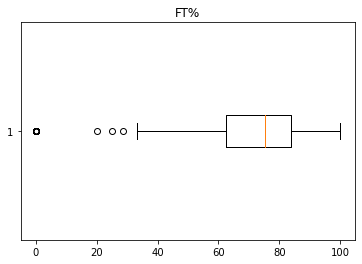

                 PLAYER   FT%
285          BJ Johnson   0.0
383       Scotty Hopson   0.0
406    Alfonzo McKinnie  25.0
411      Tremont Waters   0.0
415    Gabriel Lundberg   0.0
429           Matt Ryan   0.0
435    Denzel Valentine   0.0
437       Tyler Johnson   0.0
438      Tyrone Wallace  20.0
439          Aleem Ford   0.0
446        Gabriel Deck   0.0
448        Juwan Morgan   0.0
449          Sam Hauser   0.0
466         Ahmad Caver   0.0
468         Craig Sword   0.0
469      Damyean Dotson   0.0
470      Jemerrio Jones   0.0
471         Joe Johnson   0.0
472   Langston Galloway   0.0
474        Norvel Pelle   0.0
475  Shaquille Harrison   0.0
486    Ryan Arcidiacono   0.0
488         Rob Edwards   0.0
490         Malik Fitts   0.0
491     Darren Collison   0.0
495          Tacko Fall  28.6
497           Yves Pons   0.0
500      Dakota Mathias   0.0
501   Deividas Sirvydis   0.0
502      Jaden Springer   0.0
503       Shaq Buchanan   0.0
504        Tyrell Terry   0.0
509     Da

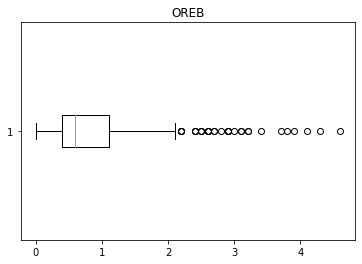

                 PLAYER  OREB
9          Nikola Jokic   2.8
14   Karl-Anthony Towns   2.6
21        Anthony Davis   2.7
43          Bam Adebayo   2.4
45     Domantas Sabonis   3.2
54    Jonas Valanciunas   3.1
63        Deandre Ayton   2.6
73        Jarrett Allen   3.4
79          Rudy Gobert   3.7
81       Scottie Barnes   2.6
84         Jusuf Nurkic   3.0
91         Jaylen Hoard   4.3
93         Bobby Portis   2.5
100        Jakob Poeltl   3.9
139        Clint Capela   3.8
160         Ivica Zubac   2.9
176        Terry Taylor   2.9
179       Chris Boucher   2.2
180      Daniel Gafford   2.2
188        JaVale McGee   2.2
193   Willy Hernangomez   2.9
213   Mitchell Robinson   4.1
220      Isaiah Stewart   3.2
225    Hassan Whiteside   2.6
228      Onyeka Okongwu   2.4
236      Andre Drummond   3.1
274        Steven Adams   4.6
275   Jarred Vanderbilt   2.9
284       Mason Plumlee   2.4
300      Day'Ron Sharpe   2.5
309        Kevon Looney   2.5
356          Khem Birch   2.2
526       

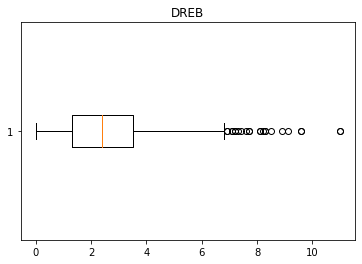

                    PLAYER  DREB
0              Joel Embiid   9.6
1             LeBron James   7.1
2    Giannis Antetokounmpo   9.6
3             Kevin Durant   6.9
4              Luka Doncic   8.3
9             Nikola Jokic  11.0
10            Jayson Tatum   6.9
14      Karl-Anthony Towns   7.2
21           Anthony Davis   7.2
30         Dejounte Murray   7.1
37           Julius Randle   8.2
43             Bam Adebayo   7.6
45        Domantas Sabonis   8.9
53          Christian Wood   8.5
54       Jonas Valanciunas   8.3
55          Nikola Vucevic   9.1
63           Deandre Ayton   7.7
65              Kyle Kuzma   7.4
73           Jarrett Allen   7.3
79             Rudy Gobert  11.0
84            Jusuf Nurkic   8.1
91            Jaylen Hoard   7.7
139           Clint Capela   8.1


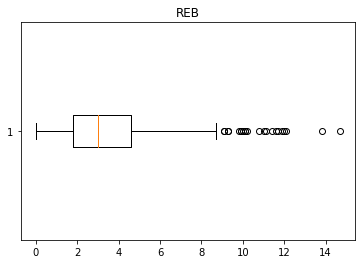

                    PLAYER   REB
0              Joel Embiid  11.7
2    Giannis Antetokounmpo  11.6
4              Luka Doncic   9.1
9             Nikola Jokic  13.8
14      Karl-Anthony Towns   9.8
21           Anthony Davis   9.9
37           Julius Randle   9.9
43             Bam Adebayo  10.1
45        Domantas Sabonis  12.1
53          Christian Wood  10.1
54       Jonas Valanciunas  11.4
55          Nikola Vucevic  11.0
63           Deandre Ayton  10.2
73           Jarrett Allen  10.8
79             Rudy Gobert  14.7
84            Jusuf Nurkic  11.1
91            Jaylen Hoard  12.0
93            Bobby Portis   9.1
100           Jakob Poeltl   9.3
139           Clint Capela  11.9
236         Andre Drummond   9.3
274           Steven Adams  10.0


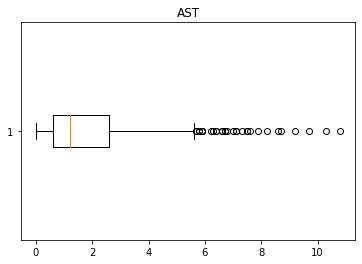

                      PLAYER   AST
1               LeBron James   6.2
2      Giannis Antetokounmpo   5.8
3               Kevin Durant   6.4
4                Luka Doncic   8.7
5                 Trae Young   9.7
7               Kyrie Irving   5.8
8                  Ja Morant   6.7
9               Nikola Jokic   7.9
13             Stephen Curry   6.3
15   Shai Gilgeous-Alexander   5.9
17               Paul George   5.7
18            Damian Lillard   7.3
20              Bradley Beal   6.6
26              James Harden  10.3
27            Darius Garland   8.6
30           Dejounte Murray   9.2
33             Fred VanVleet   6.7
36               LaMelo Ball   7.6
42           Malcolm Brogdon   5.9
47         Russell Westbrook   7.1
49              Jrue Holiday   6.8
51          D'Angelo Russell   7.1
70              Cole Anthony   5.7
80         Tyrese Haliburton   8.2
90                Chris Paul  10.8
102               Kyle Lowry   7.5
109              Ricky Rubio   6.6
116              Jos

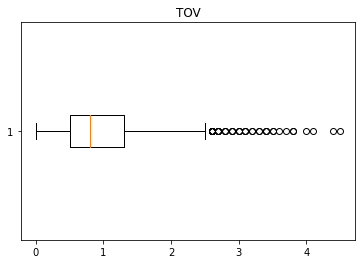

                      PLAYER  TOV
0                Joel Embiid  3.1
1               LeBron James  3.5
2      Giannis Antetokounmpo  3.3
3               Kevin Durant  3.5
4                Luka Doncic  4.5
5                 Trae Young  4.0
8                  Ja Morant  3.4
9               Nikola Jokic  3.8
10              Jayson Tatum  2.9
12          Donovan Mitchell  3.0
13             Stephen Curry  3.2
14        Karl-Anthony Towns  3.1
15   Shai Gilgeous-Alexander  2.8
16               Zach LaVine  2.6
17               Paul George  4.1
18            Damian Lillard  2.9
19              Jaylen Brown  2.7
20              Bradley Beal  3.4
22              De'Aaron Fox  2.8
23             Pascal Siakam  2.7
24            Brandon Ingram  2.7
26              James Harden  4.4
27            Darius Garland  3.6
29           Anthony Edwards  2.6
30           Dejounte Murray  2.6
31               Tyler Herro  2.6
33             Fred VanVleet  2.6
36               LaMelo Ball  3.3
37            

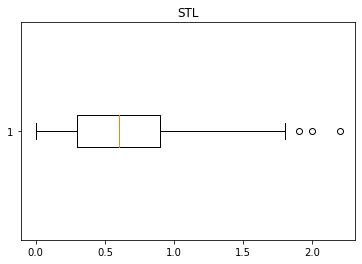

             PLAYER  STL
17      Paul George  2.2
30  Dejounte Murray  2.0
90       Chris Paul  1.9


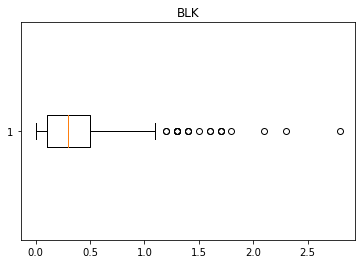

                    PLAYER  BLK
0              Joel Embiid  1.5
2    Giannis Antetokounmpo  1.4
21           Anthony Davis  2.3
34      Kristaps Porzingis  1.6
73           Jarrett Allen  1.3
79             Rudy Gobert  2.1
87             Evan Mobley  1.7
100           Jakob Poeltl  1.7
113           Myles Turner  2.8
118            Brook Lopez  1.2
139           Clint Capela  1.3
150               Mo Bamba  1.7
164             Al Horford  1.3
180         Daniel Gafford  1.4
211       Robert Covington  1.3
213      Mitchell Robinson  1.8
223         Isaiah Jackson  1.4
225       Hassan Whiteside  1.6
228         Onyeka Okongwu  1.3
408           Nerlens Noel  1.2


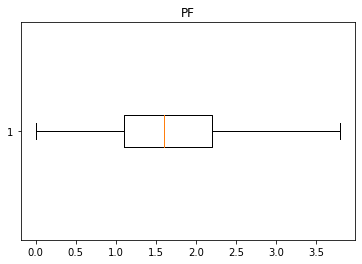

outlier 존재X


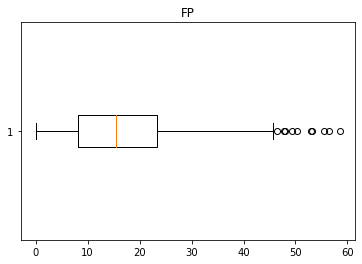

                   PLAYER    FP
0             Joel Embiid  55.5
1            LeBron James  53.0
2   Giannis Antetokounmpo  56.5
3            Kevin Durant  50.3
4             Luka Doncic  53.1
5              Trae Young  46.5
9            Nikola Jokic  58.6
21          Anthony Davis  47.9
26           James Harden  47.7
30        Dejounte Murray  49.4


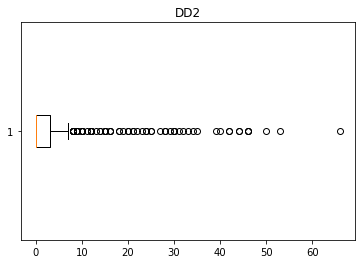

                    PLAYER  DD2
0              Joel Embiid   46
1             LeBron James   21
2    Giannis Antetokounmpo   46
3             Kevin Durant   18
4              Luka Doncic   44
..                     ...  ...
225       Hassan Whiteside   14
236         Andre Drummond   18
274           Steven Adams   14
275      Jarred Vanderbilt    8
333         Omer Yurtseven    8

[70 rows x 2 columns]


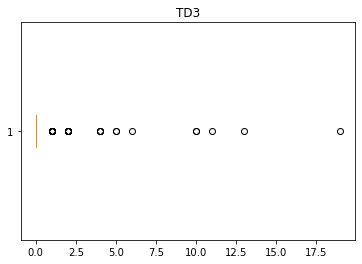

                      PLAYER  TD3
0                Joel Embiid    2
1               LeBron James    6
2      Giannis Antetokounmpo    4
3               Kevin Durant    4
4                Luka Doncic   10
8                  Ja Morant    1
9               Nikola Jokic   19
13             Stephen Curry    2
14        Karl-Anthony Towns    1
15   Shai Gilgeous-Alexander    1
19              Jaylen Brown    2
23             Pascal Siakam    2
26              James Harden   11
27            Darius Garland    1
28              Jimmy Butler    4
30           Dejounte Murray   13
33             Fred VanVleet    1
36               LaMelo Ball    5
37             Julius Randle    1
40              Terry Rozier    1
42           Malcolm Brogdon    1
45          Domantas Sabonis    5
47         Russell Westbrook   10
57           Cade Cunningham    2
60             Tobias Harris    1
65                Kyle Kuzma    1
90                Chris Paul    2
97         Spencer Dinwiddie    1
102           

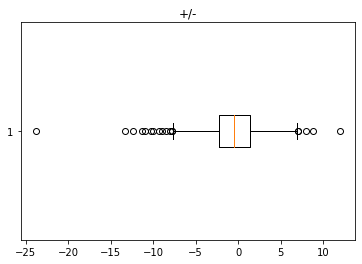

                   PLAYER   +/-
10           Jayson Tatum   8.8
13          Stephen Curry   8.0
90             Chris Paul   7.1
91           Jaylen Hoard -12.4
94          Mikal Bridges   7.0
112      Brandon Williams -11.3
141        Zavier Simpson -23.8
186          Reggie Perry  -7.8
263          Keon Johnson  -7.8
270       Sekou Doumbouya  12.0
281  Georgios Kalaitzakis -10.3
382          Micah Potter -13.3
386          Didi Louzada  -9.0
395         Cheick Diallo -11.0
427          Daniel Oturu  -8.0
448          Juwan Morgan  -8.5
501     Deividas Sirvydis  -9.3
532         Jaysean Paige -10.0


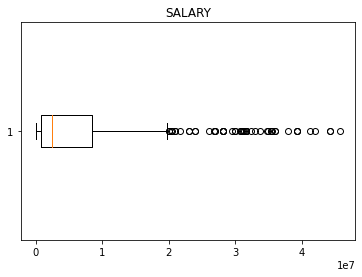

                    PLAYER    SALARY
0              Joel Embiid  31579390
1             LeBron James  41180544
2    Giannis Antetokounmpo  39344900
3             Kevin Durant  42018900
6            DeMar DeRozan  26000000
7             Kyrie Irving  35328700
9             Nikola Jokic  31044906
10            Jayson Tatum  28103500
11            Devin Booker  31650600
12        Donovan Mitchell  28103500
13           Stephen Curry  45780966
14      Karl-Anthony Towns  31650600
17             Paul George  39344970
18          Damian Lillard  39344900
19            Jaylen Brown  26758928
20            Bradley Beal  33724200
21           Anthony Davis  35361360
22            De'Aaron Fox  28103500
23           Pascal Siakam  33003936
24          Brandon Ingram  29467800
25             CJ McCollum  30864198
26            James Harden  44310840
28            Jimmy Butler  36016200
32           Klay Thompson  37980720
34      Kristaps Porzingis  31650600
38         Khris Middleton  35500000
4

In [17]:
tmp = 0
for i in range(cnt):
    plt.boxplot(Players[numeric_columns[tmp]], vert=False)
    plt.title(numeric_columns[tmp])
    plt.show()
    q3=Players[numeric_columns[tmp]].quantile(0.75)
    q1=Players[numeric_columns[tmp]].quantile(0.25)
    iqr = q3-q1
    c1 = Players[numeric_columns[tmp]]>q3+1.5*iqr
    c2 = Players[numeric_columns[tmp]]<q1-1.5*iqr
    if len(Players[c1+c2])==0:
        print("outlier 존재X")
    else :
        print(Players[c1+c2].iloc[:,[0,tmp+2]])
    tmp+=1
    

# fig, ax = plt.subplots(4, 7, constrained_layout=True)  너무 작게 나와서 수정
# for i in range(4):
#     for j in range(7):
#         ax[i][j].boxplot(Players[numeric_columns[tmp]], vert=False)
#         ax[i][j].set_title(numeric_columns[tmp])
#         min = Players[numeric_columns[tmp]].describe()['min']
#         max = Players[numeric_columns[tmp]].describe()['max']
#         ax[i][j].set_xlim(min, max)
#         tmp += 1      
# plt.show()

위 boxplot을 통해 확인할 수 있듯이 PTS, 3PM과 같이 선수들의 일부 경기기록에서 q3+1.5*iqr값보다 큰 값을 가진 선수의 경우 연봉에서도 높은 연봉을 받는 것을 확인할 수 있었다.

<AxesSubplot:>

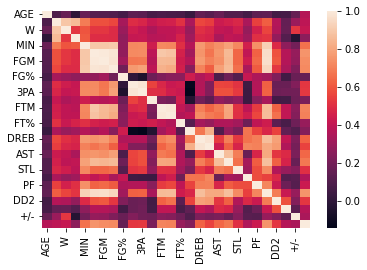

In [18]:
import seaborn as sns
import scipy.stats as stats

Players_Numerics = Players.drop(columns=['PLAYER','TEAM'])

sns.heatmap(Players_Numerics.corr())            

각 컬럼끼리의 연관정도를 확인하기 위해 pearson상관 계수를 통해 각각의 컬럼끼리들의 상관계수를 확인한 후 0.7이상인 컬럼들을 찾아보았다.

In [19]:
for c1 in Players_Numerics.columns:
    for c2 in Players_Numerics.columns:
        if c1 !=c2 : 
            corr = stats.pearsonr(Players_Numerics[c1],Players_Numerics[c2])[0]
            if corr >0.7 :
                print(c1,c2)

GP W
GP L
W GP
L GP
MIN PTS
MIN FGM
MIN FGA
MIN 3PM
MIN 3PA
MIN FTM
MIN FTA
MIN DREB
MIN AST
MIN TOV
MIN STL
MIN PF
MIN FP
PTS MIN
PTS FGM
PTS FGA
PTS 3PM
PTS 3PA
PTS FTM
PTS FTA
PTS DREB
PTS AST
PTS TOV
PTS FP
PTS SALARY
FGM MIN
FGM PTS
FGM FGA
FGM FTM
FGM FTA
FGM DREB
FGM AST
FGM TOV
FGM FP
FGM SALARY
FGA MIN
FGA PTS
FGA FGM
FGA 3PM
FGA 3PA
FGA FTM
FGA FTA
FGA DREB
FGA AST
FGA TOV
FGA FP
FGA SALARY
3PM MIN
3PM PTS
3PM FGA
3PM 3PA
3PA MIN
3PA PTS
3PA FGA
3PA 3PM
FTM MIN
FTM PTS
FTM FGM
FTM FGA
FTM FTA
FTM TOV
FTM FP
FTM SALARY
FTA MIN
FTA PTS
FTA FGM
FTA FGA
FTA FTM
FTA DREB
FTA TOV
FTA FP
OREB REB
DREB MIN
DREB PTS
DREB FGM
DREB FGA
DREB FTA
DREB REB
DREB FP
DREB DD2
REB OREB
REB DREB
REB BLK
REB FP
REB DD2
AST MIN
AST PTS
AST FGM
AST FGA
AST TOV
AST FP
TOV MIN
TOV PTS
TOV FGM
TOV FGA
TOV FTM
TOV FTA
TOV AST
TOV FP
STL MIN
STL FP
BLK REB
PF MIN
PF FP
FP MIN
FP PTS
FP FGM
FP FGA
FP FTM
FP FTA
FP DREB
FP REB
FP AST
FP TOV
FP STL
FP PF
FP SALARY
DD2 DREB
DD2 REB
SALARY PTS
SALARY FGM
SA

상관관계 분석 결과로 승과 패 경기 수는 당연히 뛴 경기수와 큰 연관정도를 보여주는 것을 확인하였다.
다음으로 경기당 뛴 시간도 당연히 대부분의 스탯과 큰 연관정도를 보여주는 것을 확인하였다.
그리고 경기당 평균 점수또한 야투와 삼점관련 스탯과 큰 연관을 보여주었고 뛴 시간이 길다보니 턴오버 개수또한 연관이 큼을 확인할 수 있었다.
그리고 득점 수가 많은 만큼 연봉을 많이 받는 것을 확인할 수 있었다.
더블더블 횟수가 리바운드가 연관이 깊은 것을 확인할 수 있었다. 이는 보통 더블더블을 기록하는 선수의 포지션이 센터라 이런 결과를 보여줄 것 같다.
다음으로 연봉은 야투시도 개수, 야투 성공률, 판타지 포인트와 자유투 성공개수가 연관이 있음을 확인할 수 있었다.
자유투 성공개수가 연관이 있는 이유로는 연봉을 많이 받는 선수들의 경기시간이 길고 자유투를 잘 넣기 떄문에 이런 결과를 보여주는 것 같다.

In [20]:
import seaborn as sns
import scipy.stats as stats
corrMap={}
pvalueMap={}
Players_Numerics = Players.drop(columns=['PLAYER','TEAM'])
Players_Numerics.corr()
for c in Players_Numerics.columns:
    corrMap[c]=stats.pearsonr(Players_Numerics[c],Players_Numerics['SALARY'])[0]
    pvalueMap[c]=stats.pearsonr(Players_Numerics[c],Players_Numerics['SALARY'])[1]
#     print(c,stats.pearsonr(Players_Numerics[c],Players_Numerics['SALARY'])[0])
    print(c,stats.pearsonr(Players_Numerics[c],Players_Numerics['SALARY']))
corrList = sorted(corrMap.items(),reverse=True, key=lambda corrMap: corrMap[1])

print("\n\ncorr 순서대로 나열\n")
for c,corr in corrList :
    print(c,corr)

AGE (0.3688401350034606, 8.814895873185982e-19)
GP (0.3909190352078615, 4.350165041992125e-21)
W (0.41230987449753986, 1.70248679114992e-23)
L (0.2613460297724476, 7.504544867967396e-10)
MIN (0.6569105506547832, 9.548037453240266e-68)
PTS (0.7457902768486144, 1.2860852615090686e-96)
FGM (0.7300994223938935, 1.0932898630940705e-90)
FGA (0.7219906979084701, 8.750638198742221e-88)
FG% (0.15852807336666502, 0.00022262885783685976)
3PM (0.5176880717121177, 3.233922631957361e-38)
3PA (0.5240448920315669, 2.7974692769784325e-39)
3P% (0.20877382699046138, 1.0335402527436312e-06)
FTM (0.7065631049244245, 1.548578133434292e-82)
FTA (0.696484215564106, 2.737330482788596e-79)
FT% (0.2872002896663376, 1.1242642214367709e-11)
OREB (0.23593397906969363, 3.057866902473741e-08)
DREB (0.6238797758596938, 2.273978917800605e-59)
REB (0.5505683220487195, 5.753562123551123e-44)
AST (0.6373349904130893, 1.169479289588178e-62)
TOV (0.6749648281168668, 8.665148839721194e-73)
STL (0.49915474082359845, 3.0473913

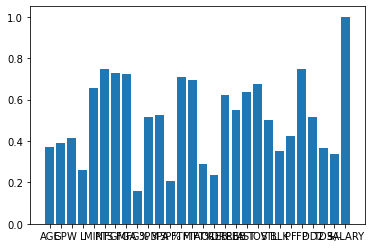

In [21]:
plt.bar(*zip(*corrMap.items()))
plt.show()

In [22]:
pvalueList = sorted(pvalueMap.items(),reverse=True, key=lambda pvalueMap: pvalueMap[1])
for c,pvalue in pvalueList:
    print(c, pvalue)

FG% 0.00022262885783685976
3P% 1.0335402527436312e-06
OREB 3.057866902473741e-08
L 7.504544867967396e-10
FT% 1.1242642214367709e-11
+/- 1.0085383132481738e-15
BLK 2.942103135776877e-17
TD3 1.2189971777639896e-18
AGE 8.814895873185982e-19
GP 4.350165041992125e-21
W 1.70248679114992e-23
PF 4.1062871326837027e-25
STL 3.0473913491912266e-35
3PM 3.233922631957361e-38
DD2 3.0376976010748734e-38
3PA 2.7974692769784325e-39
REB 5.753562123551123e-44
DREB 2.273978917800605e-59
AST 1.169479289588178e-62
MIN 9.548037453240266e-68
TOV 8.665148839721194e-73
FTA 2.737330482788596e-79
FTM 1.548578133434292e-82
FGA 8.750638198742221e-88
FGM 1.0932898630940705e-90
PTS 1.2860852615090686e-96
FP 6.096628297459438e-98
SALARY 0.0


모든 컬럼과 Salary 컬럼간의 pvalue를 확인하였을 때 0.05보다 모두 낮기 때문에 모든 컬럼이 SALARY와 통계적 유의성을 가니는 것을 확인할 수 있었다.

Salary와 상관관계가 가장 큰 것은 FP(판타지 포인트)로 3점 성공당 3점, 2점 성공시 2점, 자유투 1개 성공시 1점, 리바운드 1.2점, 어시스트 1.5점, 블록 2점, 스틸 2점, 턴오버 -1점으로 계산한 점수다. 다음으로 점수, 야투성공개수, 야투시도 개수, 자유투 성공개수, 자유투 시도 개수, 턴오버, 뛴 시간, 어시스트, 수비 리바운드, 리바운드, 3점 시도, 더블더블 횟수, 3점 성공개수, 스틸, 파울 수, 이긴 경기수, 뛴 경기수, 트리플 더블 수, 나이, 블록, 코트 마진, 자유투 성공률, 진 경기수, 공격 리바운드, 3점 성공률, 야투율 순으로 상관관계가 나오게 되었다.

-> 다만 야투성공 개수와 야투시도 개수가 높지만 야투율의 상관관계가 낮게 나온거에 대해 의문이 있었지만 농구 특성상 득점은 3명정도의 선수가 전체 점수의 반 정도를 책임지는 것을 보아 야투 시도 개수가 높아져 야투율이 낮게 나오게 된것 같다.

-> 그리고 턴오버에 대한 상관관계가 높은 이유도 앞서 나온 이유와 마찬가지로 공격이 특정 선수에 의해 의존되는 점에서 턴오버 개수가 증가하는 것 같다.

## 3. NBA 선수 클러스터링을 통한 분석

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

X_features=Players.drop(columns=['PLAYER','TEAM','SALARY','AGE']).values
print(X_features)

[[68.  45.  23.  ... 46.   2.   5.4]
 [56.  25.  31.  ... 21.   6.  -2.1]
 [67.  45.  22.  ... 46.   4.   5.9]
 ...
 [ 2.   1.   1.  ...  0.   0.  -4. ]
 [ 2.   1.   1.  ...  0.   0.  -1.5]
 [ 1.   1.   0.  ...  0.   0.  -5. ]]


In [24]:
from matplotlib import cm
import numpy as np

X_features_scaled = StandardScaler().fit_transform(X_features)

def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화  , 0, 1 차원 
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    print (c_colors)
    #각 클러스터의 중심점을 삼각형으로 표시

    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

C:\Users\race9\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


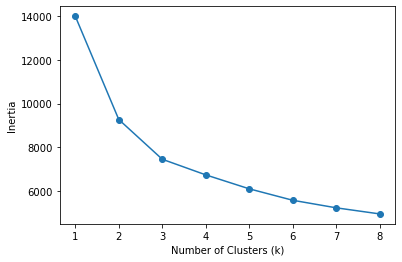

In [25]:
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in range(1,9):
    model = KMeans(n_clusters=i)
    model.fit(X_features_scaled)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(range(1,9), inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

적절한 K를 찾기 위해 Elbow기법을 사용하였다.
위 Inertia 그래프를 통해 알 수 있듯이 k가 증가함에따라 inertia은 감소하고 있음을 확인할 수 있는 데 이 중 감소하는 정도가 낮아지는 지점인
2를 k로 하였을 때 최적의 클러스터의 수라고 할수 있었다.

k가 2일 떄 최적인 지 실루엣 분석을 통해 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는 지를 확인하였다.

[(0.0, 0.0, 0.5, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0)]


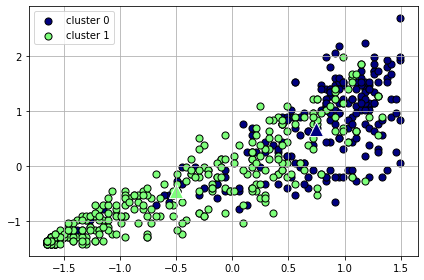

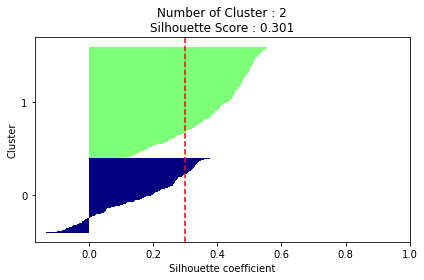

In [26]:
clusterScatter(2, X_features_scaled) 
silhouetteViz(2, X_features_scaled)
# clusterScatter(2, X_features) 
# silhouetteViz(2, X_features)

초록색 부분과 남색 부분이 어느정도 분리가 된 것을 확인할 수 있었지만 초록색 부분과 남색 부분이 조금 겹치는 부분이 있음을 확인할 수 있다.

[(0.0, 0.0, 0.5, 1.0), (0.0, 0.8333333333333334, 1.0, 1.0), (1.0, 0.9012345679012348, 0.0, 1.0)]


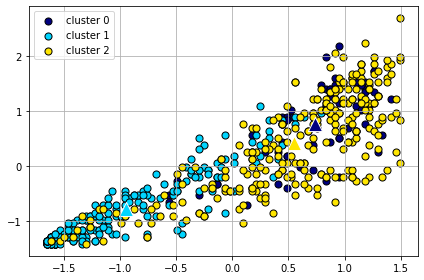

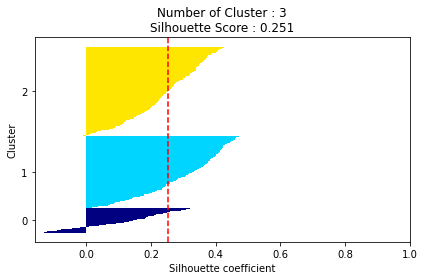

In [27]:
clusterScatter(3, X_features_scaled) 
silhouetteViz(3, X_features_scaled)
# clusterScatter(3, X_features) 
# silhouetteViz(3, X_features)

노란색과 하늘색의 분류가 잘 이루어졌지만 남색이 퍼져있어 제대로 된 분류가 되지 않았음을 확인할 수 있었다.

[(0.0, 0.0, 0.5, 1.0), (0.0, 0.503921568627451, 1.0, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (1.0, 0.5816993464052289, 0.0, 1.0)]


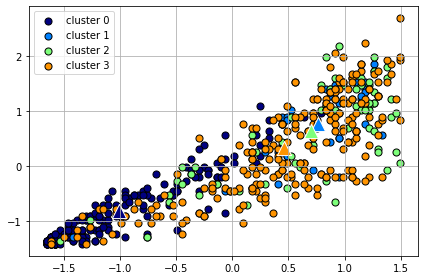

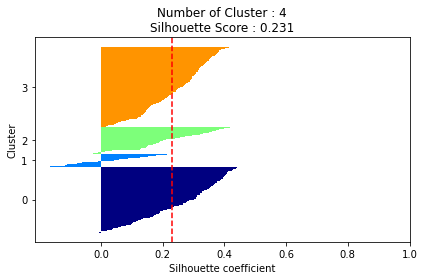

In [28]:
clusterScatter(4, X_features_scaled) 
silhouetteViz(4, X_features_scaled)
# clusterScatter(4, X_features) 
# silhouetteViz(4, X_features)

앞서 3과 마찬가지로 초록색과 하늘색의 분류가 원할히 진행되지 않았음을 확인할 수 있었다.

나이, 연봉, 선수명, 팀명을 제외하고 Scaling을 진행한 후 k=2,3,4로 Silhouette score을 측정하였을 때 각각 0.301, 0.251, 0.231로 값dmfh inertia를 통한 elbow기법과 마찬가지로 k=2일때 가장 큰 값을 보여주게 되었다. 


### 이를 통해 프로젝트 구상 당시 예측과 달리 3개의 분류로 할 때보다 2개로 분류할 때 가장 큰 값을 보여주는 것을 확인할 수 있었다.

## 4. Linear Regression을 통한 NBA 선수 분석

### FA 계약 전인 Before_FA와 후인 After_FA로 분류, fa계약전 최대 연봉인 13,000,000달러와 fa 계약전 평균 연봉인 25살 이하로 분류 진행

In [29]:
cond1 = (Players.AGE<26)&(Players.SALARY<13000000)
Before_FA=Players[cond1]
After_FA=Players[~cond1]

# 각각의
print(len(Before_FA)+len(After_FA)==len(Players))

True


In [30]:
After_FA.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,SALARY
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,2.770000e+02
mean,29.317690,47.620939,25.346570,22.274368,21.420578,9.826715,3.596390,7.821661,44.669675,1.100722,...,2.305415,1.198195,0.682310,0.410108,1.762455,20.174729,5.111913,0.361011,0.125271,1.070694e+07
std,3.283712,24.252835,15.415352,12.628635,9.447079,7.037004,2.525448,5.221350,11.547110,0.952380,...,2.007488,0.879371,0.423338,0.395773,0.755726,12.362537,10.811885,1.765099,3.129281,1.143004e+07
min,24.000000,1.000000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,5.317600e+04
25%,27.000000,30.000000,13.000000,13.000000,14.000000,4.300000,1.600000,3.700000,40.200000,0.300000,...,0.900000,0.600000,0.400000,0.200000,1.200000,10.500000,0.000000,0.000000,-1.900000,1.762796e+06
50%,29.000000,54.000000,25.000000,24.000000,21.600000,8.000000,3.000000,6.300000,44.800000,0.800000,...,1.700000,0.900000,0.600000,0.300000,1.800000,18.100000,1.000000,0.000000,0.200000,5.333334e+06
75%,31.000000,67.000000,38.000000,30.000000,29.400000,13.600000,5.000000,10.700000,50.000000,1.700000,...,3.400000,1.600000,1.000000,0.500000,2.300000,27.900000,3.000000,0.000000,2.300000,1.707317e+07
max,41.000000,82.000000,57.000000,59.000000,37.900000,30.600000,11.400000,21.800000,100.000000,4.500000,...,10.800000,4.400000,2.200000,2.800000,3.700000,58.600000,66.000000,19.000000,8.800000,4.578097e+07


In [31]:
Before_FA.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,SALARY
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,...,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,22.827586,39.283525,18.647510,20.636015,16.481992,6.953640,2.585057,5.757854,42.655939,0.751724,...,1.501149,0.873180,0.530268,0.333333,1.468199,14.475096,2.363985,0.107280,-1.245594,2.359467e+06
std,1.660910,26.611812,14.881528,15.362344,9.511905,5.515011,2.030339,4.344721,16.032976,0.741754,...,1.622166,0.767294,0.384662,0.333282,0.807146,9.899026,5.950573,0.762072,3.575411,2.452601e+06
min,19.000000,1.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.800000,3.722300e+04
25%,22.000000,12.000000,5.000000,6.000000,8.600000,3.000000,1.100000,2.400000,38.600000,0.100000,...,0.500000,0.400000,0.200000,0.100000,0.900000,7.000000,0.000000,0.000000,-2.900000,4.626290e+05
50%,23.000000,42.000000,17.000000,21.000000,15.800000,6.100000,2.300000,4.800000,44.100000,0.600000,...,1.000000,0.700000,0.500000,0.300000,1.500000,13.200000,0.000000,0.000000,-0.900000,1.782621e+06
75%,24.000000,65.000000,31.000000,33.000000,23.300000,9.200000,3.500000,7.500000,49.700000,1.100000,...,2.000000,1.100000,0.800000,0.500000,2.000000,20.200000,2.000000,0.000000,0.800000,3.277080e+06
max,25.000000,82.000000,64.000000,59.000000,43.500000,28.400000,10.200000,21.600000,100.000000,3.100000,...,9.700000,4.500000,1.700000,1.800000,3.800000,53.100000,44.000000,10.000000,12.000000,1.263295e+07


In [32]:
# describe를 통해 확인하였을 떄 몇개의 컬럼이 생략됨을 확인할 수 있었다.
# fa계약전 선수와 계약 후 선수의 스탯 비교

def makeDiscribe(players, players2):
    for c in players.columns:
        print(c)
        print("Mean : ",players[c].mean()-players2[c].mean())
        print("Std : ",players[c].std()- players2[c].std())
        print("Min : ",players[c].min()- players2[c].min())
        print("50% : ",players[c].quantile(0.5)-players2[c].quantile(0.5))
        print("Max : ",players[c].max()-players2[c].max())
        print("\n")
        
makeDiscribe(After_FA.drop(columns=['PLAYER','TEAM']), Before_FA.drop(columns=['PLAYER','TEAM']))


AGE
Mean :  6.49010332378937
Std :  1.6228025792407104
Min :  5
50% :  6.0
Max :  16


GP
Mean :  8.337413723944287
Std :  -2.358977171220527
Min :  0
50% :  12.0
Max :  0


W
Mean :  6.699060818567855
Std :  0.5338235733163081
Min :  0
50% :  8.0
Max :  -7


L
Mean :  1.6383529053764327
Std :  -2.7337093183758974
Min :  0
50% :  3.0
Max :  0


MIN
Mean :  4.938585280163771
Std :  -0.06482604576813777
Min :  1.0999999999999999
50% :  5.800000000000001
Max :  -5.600000000000001


PTS
Mean :  2.873074954700754
Std :  1.5219935890845866
Min :  0.0
50% :  1.9000000000000004
Max :  2.200000000000003


FGM
Mean :  1.0113324204323844
Std :  0.49510872427468433
Min :  0.0
50% :  0.7000000000000002
Max :  1.200000000000001


FGA
Mean :  2.0638062436892293
Std :  0.8766293015430096
Min :  0.0
50% :  1.5
Max :  0.1999999999999993


FG%
Mean :  2.013736392934682
Std :  -4.485866272832935
Min :  0.0
50% :  0.6999999999999957
Max :  0.0


3PM
Mean :  0.3489978837296157
Std :  0.21062645767510835
Min

After_FA와 Before_FA의 대부분의 컬럼에서 After_FA에서 더 큰 값을 보여주게 된다. 하지만 샐러리의 경우 연봉을 많이 받는 사람은 
상대적으로 소수이고 훨씬 많은 연봉을 적게 받는 사람들이 많아 Mean값의 차이와 중간값의 차이가 생각보다 크게 나타나지 않았다.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Y = After_FA['SALARY']
X = After_FA.drop(columns=['PLAYER','TEAM','SALARY'])

# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 선형회귀분석 : 모델 생성
lr = LinearRegression()

# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 4))

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

coef = pd.Series(data=np.round(lr.coef_, 4), index=X.columns)
print(coef)

Y 절편 값:  -5919649.41
회귀 계수 값:  [ 2.81548417e+05  1.60149740e+04 -2.35722656e+04  3.95872395e+04
 -2.96739479e+04  1.35510357e+07 -1.44017208e+07 -1.55025965e+05
 -4.22043311e+04 -3.76066510e+06 -5.64955998e+05 -1.18199075e+05
 -7.83291907e+06  1.09411023e+06 -1.08828380e+04  2.43757393e+06
  2.62002092e+06  4.03198351e+06  8.90861232e+06 -3.45136593e+06
  1.60146512e+07  1.89466940e+07 -1.64806235e+06 -5.42022049e+06
 -8.39065680e+03 -1.85033129e+05  2.12453788e+05]
MSE : 42178884674333.117, RMSE : 6494527.286
AGE     2.815484e+05
GP      1.601497e+04
W      -2.357227e+04
L       3.958724e+04
MIN    -2.967395e+04
PTS     1.355104e+07
FGM    -1.440172e+07
FGA    -1.550260e+05
FG%    -4.220433e+04
3PM    -3.760665e+06
3PA    -5.649560e+05
3P%    -1.181991e+05
FTM    -7.832919e+06
FTA     1.094110e+06
FT%    -1.088284e+04
OREB    2.437574e+06
DREB    2.620021e+06
REB     4.031984e+06
AST     8.908612e+06
TOV    -3.451366e+06
STL     1.601465e+07
BLK     1.894669e+07
PF     -1.648062e+06
F

이 경우, 연봉 예측 값이 평균적으로 6,512,172 달러 정도 차이가 나게 되어서 조금 더 회귀분석 모델의 성능이 향상되어야 한다고 생각했다.

PTS: 599.948727
FGA: 528.277106
FGM: 516.950200
FP: 499.753623
TOV: 344.549397
FTM: 305.779559
FTA: 288.565600
MIN: 271.057893
AST: 197.182507
DREB: 150.497327
REB: 103.793944
3PA: 100.806650
3PM: 89.280388
DD2: 81.761975
STL: 80.440707
PF: 54.642620
GP: 41.807919
W: 36.271901
BLK: 32.434093
TD3: 32.432925
+/-: 29.850788
FT%: 25.539817
L: 25.229627
OREB: 15.303277
3P%: 7.455756
FG%: 6.066614
AGE: 0.854933


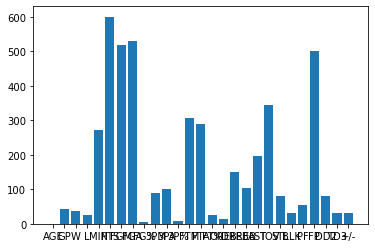

In [34]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

list={}
# feature selection
def select_features(X_train, y_train, X_test, k):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test,27)

for i in range(len(fs.scores_)):
    list[X_test.columns[i]]=fs.scores_[i]
#     print('%s: %f' % (X_test.columns[i], fs.scores_[i]))
cols=[]
list = sorted(list.items(),reverse=True, key=lambda list: list[1])
for c, num in list:
    cols.append(c)
    print('%s: %f' % (c, num))
# plot the scores
pyplot.bar(X_test.columns, fs.scores_)
pyplot.show()

fs.score을 통해 각 feature들을 분석하였을 때 feature는 MIN, PTS, FGM, FGA, 3PA, FTM, FTA, DREB, REB, AST, TOV,FP로 12개의 컬럼이 100이 넘는 값이 나오게 되었다.

In [35]:
print(cols)

['PTS', 'FGA', 'FGM', 'FP', 'TOV', 'FTM', 'FTA', 'MIN', 'AST', 'DREB', 'REB', '3PA', '3PM', 'DD2', 'STL', 'PF', 'GP', 'W', 'BLK', 'TD3', '+/-', 'FT%', 'L', 'OREB', '3P%', 'FG%', 'AGE']


### for문을 통해 각각의 컬럼을 fs_score순으로 저장한 후 상위 컬럼 5개에서 27개를 선택하여 선형 회귀 분석을 진행하였다. 따라서 이 결과를 rmse순으로 출력시켰다. 

In [36]:
Y = After_FA['SALARY']
list={}
def lr_col_select(n):
    
    print(str(n)+'개의 컬럼 선택')
    print(cols[0:n])
    X_sel = After_FA.filter(items=cols[0:n])
    # 훈련용 데이터와 평가용 데이터 분할하기
    X_train_sel, X_test_sel, Y_train_sel, Y_test_sel = train_test_split(X_sel, Y, test_size=0.3, random_state=0)

    # 선형회귀분석 : 모델 생성
    lr2 = LinearRegression()

    # 선형회귀분석 : 모델 훈련
    lr2.fit(X_train_sel, Y_train_sel)

    # 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
    Y_predict_sel = lr2.predict(X_test_sel)

    print('Y 절편 값: ',  np.round(lr2.intercept_, 2))
    print('회귀 계수 값: ', np.round(lr2.coef_, 4))

    mse = mean_squared_error(Y_test_sel, Y_predict_sel)
    rmse = np.sqrt(mse)
    print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
    list[n]=rmse
    coef = pd.Series(data=np.round(lr2.coef_, 4), index=X_sel.columns)
    print(coef)

for i in range(5,28):
    lr_col_select(i)
    print("\n\n\n")

5개의 컬럼 선택
['PTS', 'FGA', 'FGM', 'FP', 'TOV']
Y 절편 값:  -4226797.46
회귀 계수 값:  [ 1758470.8904   288248.392  -3055303.9056   149019.9899  2402418.2584]
MSE : 47237698252494.875, RMSE : 6872968.664
PTS    1.758471e+06
FGA    2.882484e+05
FGM   -3.055304e+06
FP     1.490200e+05
TOV    2.402418e+06
dtype: float64




6개의 컬럼 선택
['PTS', 'FGA', 'FGM', 'FP', 'TOV', 'FTM']
Y 절편 값:  -4283329.61
회귀 계수 값:  [ 2078198.1956   116455.7662 -3434078.4323   151529.3717  2576871.6204
  -417676.529 ]
MSE : 47539520617808.977, RMSE : 6894890.907
PTS    2.078198e+06
FGA    1.164558e+05
FGM   -3.434078e+06
FP     1.515294e+05
TOV    2.576872e+06
FTM   -4.176765e+05
dtype: float64




7개의 컬럼 선택
['PTS', 'FGA', 'FGM', 'FP', 'TOV', 'FTM', 'FTA']
Y 절편 값:  -4294051.33
회귀 계수 값:  [ 2180085.2012   174091.9869 -3695058.699    123749.6925  2561089.4452
 -1680754.5422  1026744.6704]
MSE : 48084438948754.289, RMSE : 6934294.409
PTS    2.180085e+06
FGA    1.740920e+05
FGM   -3.695059e+06
FP     1.237497e+05
TOV    2.561089e+0

In [37]:
list = sorted(list.items(),reverse=False, key=lambda list: list[1])
for n, num in list:
    print('%d개의 컬럼 : %f' % (n, num))

27개의 컬럼 : 6494527.286441
19개의 컬럼 : 6611778.654109
20개의 컬럼 : 6618967.303568
24개의 컬럼 : 6648810.187166
21개의 컬럼 : 6652623.568273
23개의 컬럼 : 6653659.256961
22개의 컬럼 : 6653659.256961
18개의 컬럼 : 6668589.699139
25개의 컬럼 : 6731374.510392
16개의 컬럼 : 6736057.288620
17개의 컬럼 : 6741855.656052
26개의 컬럼 : 6747531.473021
5개의 컬럼 : 6872968.663721
15개의 컬럼 : 6883560.519196
6개의 컬럼 : 6894890.906882
9개의 컬럼 : 6909323.525186
7개의 컬럼 : 6934294.408861
10개의 컬럼 : 6942787.336915
12개의 컬럼 : 6951916.533942
11개의 컬럼 : 6958560.504370
14개의 컬럼 : 6966914.310089
8개의 컬럼 : 6983284.641014
13개의 컬럼 : 6995240.092573


각각의 rmse값을 분석한 결과 27개의 컬럼을 모두 사용하였을 때 rmse값이 가장 낮게 나오게 되었다.

### 모든 컬럼을 사용하여 만든 모델을 통해 Before_FA에 속한 각각의 선수들의 FA 계약 후 연봉을 예측하였다.

In [38]:
for i in range(len(Before_FA)):
#     print(Before_FA.iloc[i,2:29])
    list=[]
    for j in range(2,29):
#         print(Before_FA.iloc[i,j])
        list.append(Before_FA.iloc[i,j])
    print(int(lr.predict([list])[0]),Before_FA.iloc[i,0])

40064257 Luka Doncic
39131982 Trae Young
34613156 Ja Morant
29279608 Shai Gilgeous-Alexander
29327177 Darius Garland
25226523 Anthony Edwards
23776335 Tyler Herro
22201470 Miles Bridges
24342679 LaMelo Ball
19493659 RJ Barrett
21642553 Jordan Poole
17348211 Desmond Bane
16402491 Tyrese Maxey
20164103 Cade Cunningham
18094679 Anfernee Simons
19445488 Jalen Green
16362983 Luguentz Dort
12644080 Deandre Ayton
15304508 Keldon Johnson
20370820 Cole Anthony
14367776 Jalen Brunson
15958603 Saddiq Bey
13227670 Collin Sexton
19273308 Tyrese Haliburton
13066659 Scottie Barnes
13412532 Franz Wagner
17991603 Evan Mobley
9285067 Jaylen Hoard
12004358 Mikal Bridges
16681707 Malik Monk
10117907 De'Andre Hunter
12454767 Chris Duarte
12361324 Brandon Williams
11615465 Coby White
15505150 Josh Giddey
10659438 Devin Vassell
9917594 Kevin Huerter
13255271 Jalen Suggs
2504379 Cameron Oliver
11241516 Davion Mitchell
4592816 Rui Hachimura
10553874 Immanuel Quickley
6794544 Zavier Simpson
7082763 Hamidou Dial

최근 fa계약을 진행한 luka Doncic의 22-23시즌 연봉 36,600,000, 23-24 : 39,528,000, 24-25 42,456,000로 모델을 통해 예측한 40,064,257이 어느 정도 근소 값을 가지는 것을 확인할 수 있었다. 